# Function definition and testing 

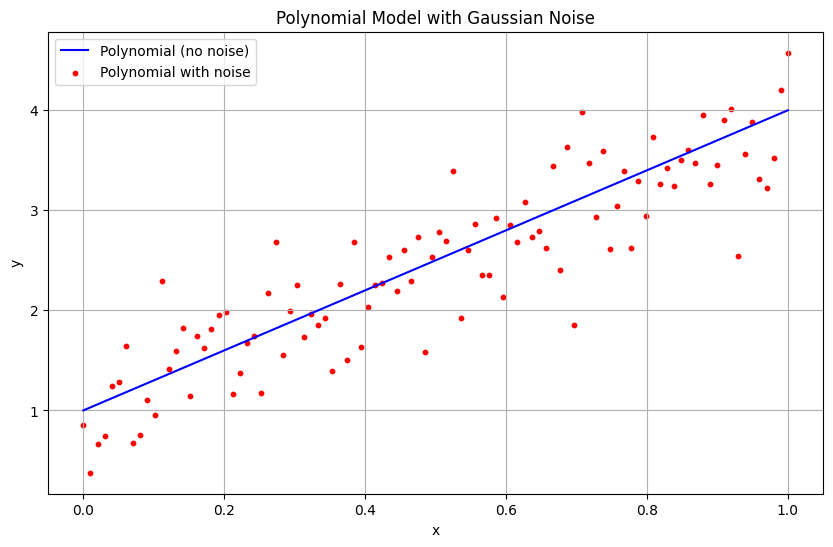

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the polynomial model function
def polyModel(x, theta):
    """
    Evaluates a polynomial function for given x values and coefficients.

    Parameters:
        x (numpy array): Array of x values.
        theta (numpy array): Coefficients of the polynomial in ascending order.

    Returns:
        numpy array: Computed polynomial values for each x.
    """
    y = np.zeros_like(x)  # Initialize the output array with zeros
    for i, coef in enumerate(theta):
        y += coef * (x ** i)  # Add each term of the polynomial
    return y

# Define the polynomial model with added noise
def polyModelWithNoise(x, theta, sigma):
    """
    Evaluates a polynomial function with Gaussian noise added.

    Parameters:
        x (numpy array): Array of x values.
        theta (numpy array): Coefficients of the polynomial in ascending order.
        sigma (float): Standard deviation of the Gaussian noise.

    Returns:
        numpy array: Polynomial values with added noise.
    """
    y = polyModel(x, theta)  # Compute the polynomial values
    noise = np.random.normal(0, sigma, size=x.shape)  # Generate Gaussian noise
    return y + noise  # Add noise to the polynomial values

# Generate 100 evenly spaced x values between 0 and 1
x = np.linspace(0, 1, 100)

# Define the coefficients for the polynomial (theta array)
theta = np.array([1, 3])  # Corresponds to y(x) = 1 + 3x

# Evaluate the polynomial without noise
y_poly = polyModel(x, theta)

# Evaluate the polynomial with added noise (sigma = 0.5)
y_poly_noise = polyModelWithNoise(x, theta, sigma=0.5)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y_poly, label="Polynomial (no noise)", color="blue")  # Plot polynomial line
plt.scatter(x, y_poly_noise, label="Polynomial with noise", color="red", s=10)  # Plot noisy data
plt.title("Polynomial Model with Gaussian Noise")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Gradient Descend

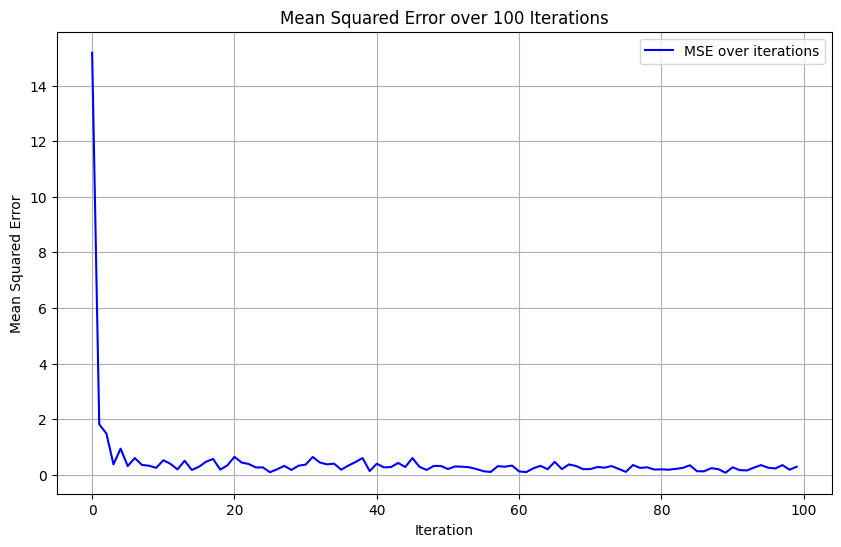

Final estimated theta values: [0.99377662 3.94642287]


In [2]:
# Define the gradient calculation for the polynomial model
def polyGradient(x, theta):
    """
    Calculate the gradient of the polynomial with respect to theta.

    Parameters:
    x (array): Input values
    theta (array): Polynomial coefficients

    Returns:
    array: Gradient matrix with shape (len(x), len(theta))
    """
    # Each row corresponds to [1, x, x^2, ..., x^(len(theta)-1)]
    gradients = np.array([x**i for i in range(len(theta))]).T
    return gradients

# Implement the stochastic gradient descent algorithm
def stochastic_gradient_descent():
    """
    Perform stochastic gradient descent to minimize the mean squared error
    and estimate polynomial coefficients.

    Returns:
    array: Final optimized theta values
    """
    # Define the true polynomial coefficients and noise level
    true_theta = np.array([1, 4])  # True polynomial coefficients
    sigma = 0.5  # Noise standard deviation

    # Initialize parameters
    theta = np.array([-1, 0.5])  # Initial guess for coefficients
    learning_rate = 0.5  # Learning rate for updates
    iterations = 100  # Number of iterations
    mse_list = []  # To track mean squared error across iterations

    # Loop for gradient descent
    for _ in range(iterations):
        # Generate 10 random x values uniformly distributed between 0 and 1
        x_sample = np.random.uniform(0, 1, 10)

        # Generate noisy y data using the true polynomial coefficients
        y_data = polyModelWithNoise(x_sample, true_theta, sigma)

        # Predict y values using the current theta
        y_model = polyModel(x_sample, theta)

        # Calculate the error (residual) between y_data and y_model
        error = y_data - y_model

        # Compute the mean squared error for tracking
        mse = np.mean(error**2)
        mse_list.append(mse)

        # Calculate the gradient matrix with respect to theta
        gradient = polyGradient(x_sample, theta)

        # Update theta using gradient descent rule
        # Theta update: theta = theta + learning_rate * mean(gradient * error)
        theta += learning_rate * np.mean(gradient * error[:, None], axis=0)

    # Plot the mean squared error over the iterations
    plt.figure(figsize=(10, 6))
    plt.plot(range(iterations), mse_list, label="MSE over iterations", color="blue")
    plt.title("Mean Squared Error over 100 Iterations")
    plt.xlabel("Iteration")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.legend()
    plt.show()

    return theta

# Run the gradient descent algorithm and print final theta values
final_theta = stochastic_gradient_descent()
print("Final estimated theta values:", final_theta)


# Results plotting and higher order polynomial

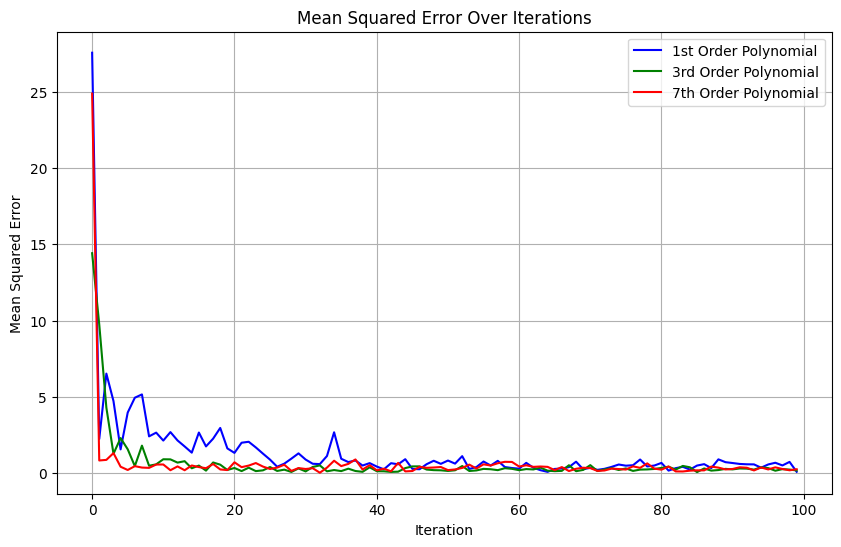

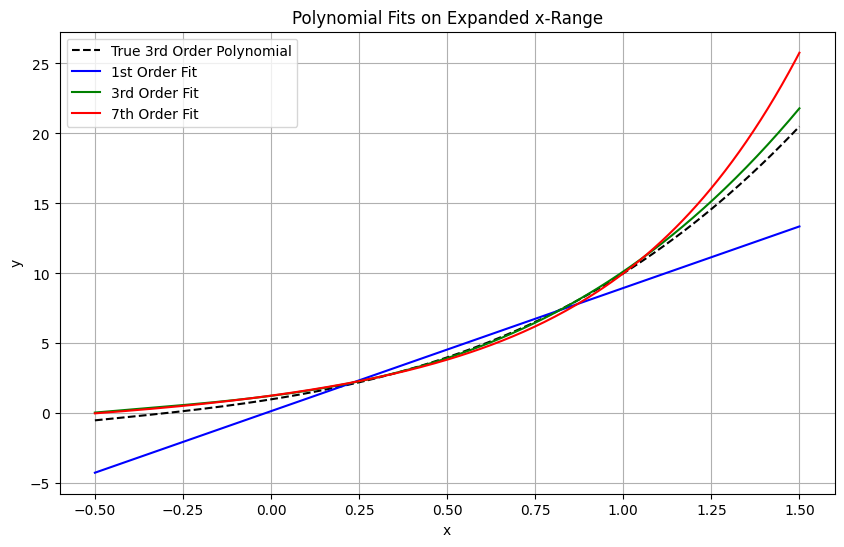

In [3]:
# Implement a general stochastic gradient descent algorithm
def stochastic_gradient_descent_general(order, true_theta, sigma, iterations=100, learning_rate=0.5):
    """
    Perform stochastic gradient descent for polynomial fitting.

    Parameters:
    order (int): Degree of the polynomial model to fit
    true_theta (array): Coefficients of the true polynomial
    sigma (float): Standard deviation of noise in the data
    iterations (int): Number of gradient descent steps
    learning_rate (float): Learning rate for updates

    Returns:
    tuple: Optimized theta values, list of mean squared errors over iterations
    """
    # Initialize theta to zero for the specified polynomial order
    theta = np.zeros(order + 1)
    mse_list = []  # List to store mean squared error at each iteration

    for _ in range(iterations):
        # Generate a random sample of x values
        x_sample = np.random.uniform(0, 1, 10)

        # Generate noisy y data based on the true polynomial
        y_data = polyModelWithNoise(x_sample, true_theta, sigma)

        # Predict y values using the current model parameters
        y_model = polyModel(x_sample, theta)

        # Calculate the error (difference between data and model predictions)
        error = y_data - y_model

        # Compute and store the mean squared error
        mse = np.mean(error**2)
        mse_list.append(mse)

        # Compute the gradient of the polynomial with respect to theta
        gradient = polyGradient(x_sample, theta)

        # Update theta using the gradient descent rule
        theta += learning_rate * np.mean(gradient * error[:, None], axis=0)

    return theta, mse_list

# Define parameters for the true third-order polynomial
true_theta = np.array([1, 4, 3, 2])  # True 3rd order polynomial coefficients
sigma = 0.5  # Noise standard deviation
iterations = 100  # Number of iterations

# Fit data using 1st, 3rd, and 7th order polynomials
theta_1, mse_1 = stochastic_gradient_descent_general(order=1, true_theta=true_theta, sigma=sigma, iterations=iterations)
theta_3, mse_3 = stochastic_gradient_descent_general(order=3, true_theta=true_theta, sigma=sigma, iterations=iterations)
theta_7, mse_7 = stochastic_gradient_descent_general(order=7, true_theta=true_theta, sigma=sigma, iterations=iterations)

# Plot mean squared error vs iteration for all models
plt.figure(figsize=(10, 6))
plt.plot(range(iterations), mse_1, label="1st Order Polynomial", color="blue")
plt.plot(range(iterations), mse_3, label="3rd Order Polynomial", color="green")
plt.plot(range(iterations), mse_7, label="7th Order Polynomial", color="red")
plt.title("Mean Squared Error Over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()

# Define an expanded x-range for plotting
x_expanded = np.linspace(-0.5, 1.5, 200)
y_true = polyModel(x_expanded, true_theta)  # True 3rd order polynomial
y_1 = polyModel(x_expanded, theta_1)  # 1st order fit
y_3 = polyModel(x_expanded, theta_3)  # 3rd order fit
y_7 = polyModel(x_expanded, theta_7)  # 7th order fit

# Plot the true polynomial and the fitted models
plt.figure(figsize=(10, 6))
plt.plot(x_expanded, y_true, label="True 3rd Order Polynomial", color="black", linestyle="dashed")
plt.plot(x_expanded, y_1, label="1st Order Fit", color="blue")
plt.plot(x_expanded, y_3, label="3rd Order Fit", color="green")
plt.plot(x_expanded, y_7, label="7th Order Fit", color="red")
plt.title("Polynomial Fits on Expanded x-Range")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# Comments on each best fit models

#### 1st Order Polynomial Fit
The 1st order polynomial fit significantly underfits the data. Within the training range [0,1], it fails to capture the true curve's complexity, as evidenced by the mismatch in shape and magnitude. Outside the training range ([−0.5,0] and [1,1.5]), the model's linear nature causes further deviation, making it completely unsuitable for generalizing beyond the training region. The simplicity of this model results in poor flexibility, which is reflected in its inability to adapt to the polynomial's curvature.

#### 3rd Order Polynomial Fit
The 3rd order polynomial fit closely matches the true curve, both within the training range and outside it. Since the true data is generated from a 3rd order polynomial, this model aligns well with the underlying relationship. Over the extended range (

[−0.5,1.5]), the 3rd order model continues to follow the true polynomial's trend, demonstrating excellent generalization. This indicates that the model has the optimal balance of complexity and flexibility for this dataset.

#### 7th Order Polynomial Fit
The 7th order polynomial fit appears to follow the true curve reasonably well within the training range. However, it exhibits signs of overfitting, capturing noise rather than the underlying pattern. Outside the training range, the overfitting becomes more pronounced, resulting in exaggerated oscillations. This indicates poor generalization beyond the training data. While the 7th order model can fit the training data closely, its excessive flexibility leads to instability when extrapolating, making it unsuitable for capturing the true polynomial's behavior.

#### Conclusion
The 3rd order polynomial is the most ideal model for both interpolation within the training range and extrapolation to unseen regions. The 1st order model lacks complexity and fails to generalize, while the 7th order model overfits and performs poorly in regions beyond the training data. This demonstrates the importance of selecting a model with appropriate complexity for accurate generalization.